In [12]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
#Importing dataset
dataset = pd.read_csv('Position_Salaries.csv')

#Ensure X is a matrix and y is a vector
X = dataset.iloc[: , 1:2].values #Uperbound is not included
y = dataset.iloc[:, 2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [14]:
#Applying feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = y.reshape(-1, 1)
y = sc_y.fit_transform(y)

In [15]:
#Fitting SVR to dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') 
regressor.fit(X ,y)

/Users/yuvrajsingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))
sc_y.inverse_transform(y_pred)

array([170370.0204065])

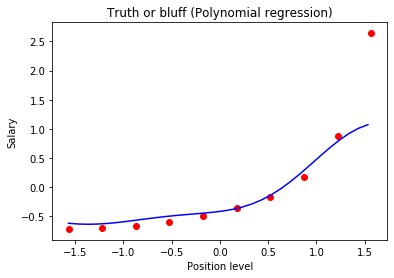

In [8]:
#Visualizing linear regression model results
X_grid = np.arange(min(X) ,  max(X) , 0.1) #this gives a vector 
X_grid = X_grid.reshape((len(X_grid)),1)
plt.scatter(X , y , color='red')
plt.plot(X_grid , regressor.predict(X_grid), color='blue')
plt.title('Truth or bluff (Polynomial regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()